# Medical Cost Personal Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import cross_validation, metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

/home/ibtissem/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


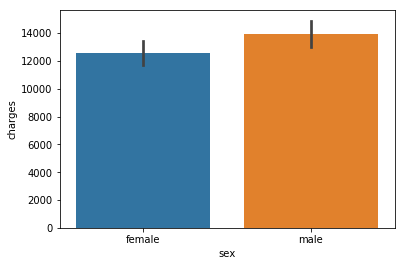

In [7]:
sns.barplot(x='sex', y='charges', data=df)

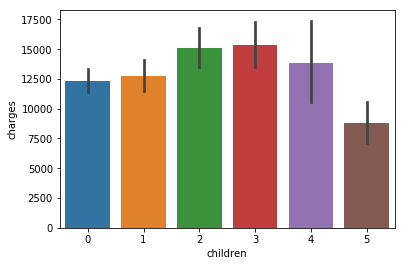

In [8]:
sns.barplot(x='children', y='charges', data=df)

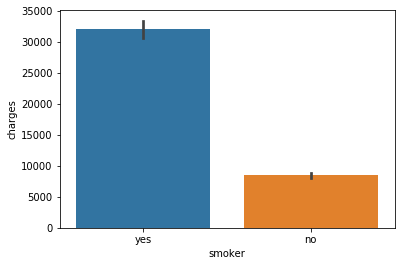

In [9]:
sns.barplot(x='smoker', y='charges', data=df)

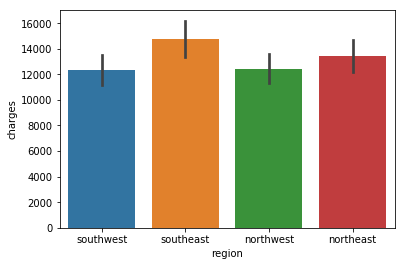

In [10]:
sns.barplot(x='region', y='charges', data=df)

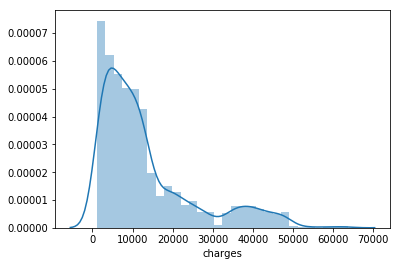

In [11]:
sns.distplot(df['charges'])

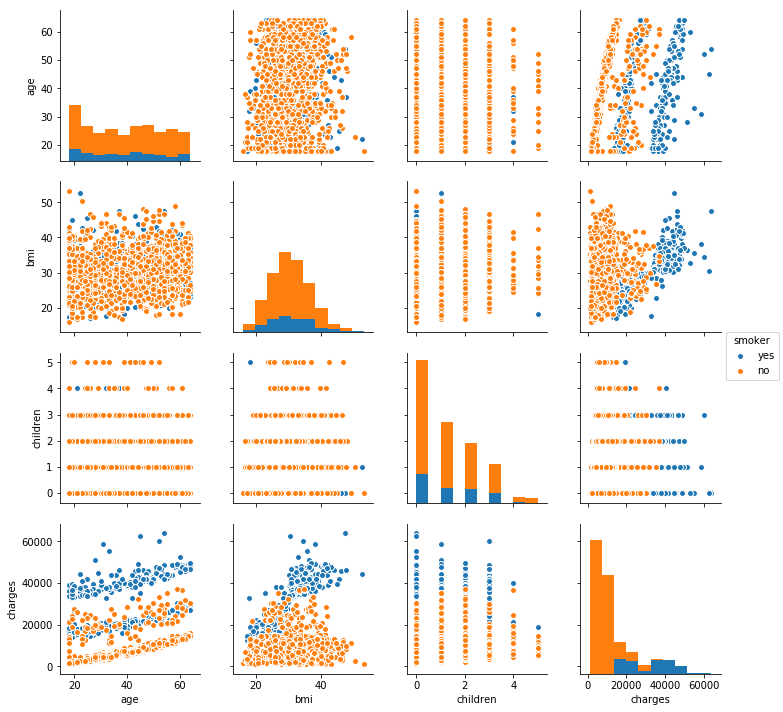

In [12]:
sns.pairplot(df, hue='smoker')

- As Age and BMI go up Charges for health insurance also trends up.

- No obvious connection between Charges and Age.

- Charges for Smokers are higher for non-smokers. 

- No obvious connection between Charges and Region.

In [13]:
numeric=LabelEncoder()
df['sex']=numeric.fit_transform(df['sex'])
df['smoker']=numeric.fit_transform(df['smoker'])

In [14]:
regions=pd.get_dummies(df['region'], drop_first=True)

In [15]:
df = pd.concat([df,regions],axis=1)
df.drop('region', inplace=True, axis=1)

In [16]:
df.sample(10)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
815,20,0,31.460,0,0,1877.92940,0,1,0
27,55,0,32.775,2,0,12268.63225,1,0,0
1237,58,0,28.215,0,0,12224.35085,1,0,0
642,61,1,33.915,0,0,13143.86485,0,0,0
589,38,0,30.690,1,0,5976.83110,0,1,0
257,38,0,40.150,0,0,5400.98050,0,1,0
1333,50,1,30.970,3,0,10600.54830,1,0,0
1328,23,0,24.225,2,0,22395.74424,0,0,0
593,21,0,21.850,1,1,15359.10450,0,0,0
96,54,0,30.800,3,0,12105.32000,0,0,1


In [17]:
df.duplicated().sum()

1

In [18]:
df=df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
corr=pd.DataFrame(np.corrcoef(df.values.T), df.columns, df.columns)
corr

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.298308,0.001495,-0.012311,0.009415
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.058044,-0.012482,0.017578,-0.003767
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.198401,-0.136138,0.270057,-0.006211
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.067389,0.026044,-0.023492,0.021538
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.787234,-0.036321,0.068282,-0.037168
charges,0.298308,0.058044,0.198401,0.067389,0.787234,1.000000,-0.038695,0.073578,-0.043637
northwest,0.001495,-0.012482,-0.136138,0.026044,-0.036321,-0.038695,1.000000,-0.345909,-0.320493
southeast,-0.012311,0.017578,0.270057,-0.023492,0.068282,0.073578,-0.345909,1.000000,-0.346614
southwest,0.009415,-0.003767,-0.006211,0.021538,-0.037168,-0.043637,-0.320493,-0.346614,1.000000


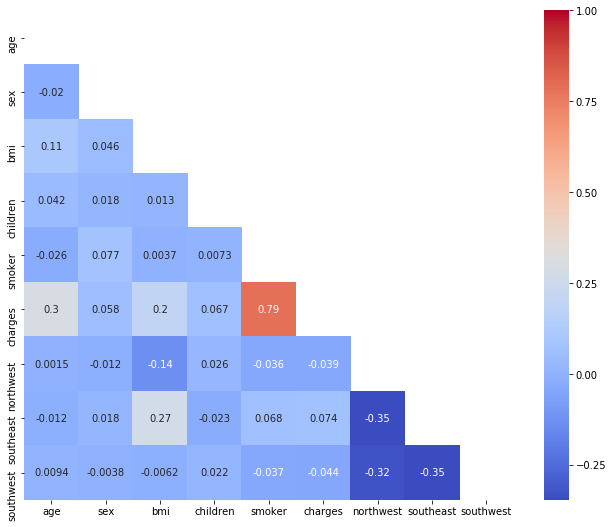

In [21]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,mask=mask, annot=True, square=True, cmap='coolwarm')

In [22]:
cols=df.columns.values
X=df[[col for col in cols if col!='charges']]
Y=df['charges']

In [23]:
scaler=StandardScaler()
df[cols]=scaler.fit_transform(df[cols])

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3)

In [25]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
predictions=model.predict(X_test)

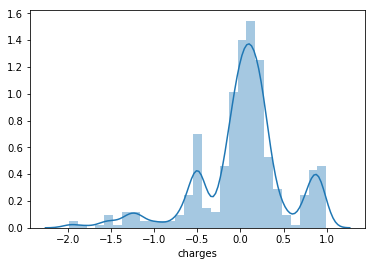

In [27]:
sns.distplot(predictions-y_test)

In [28]:
metrics.explained_variance_score(y_pred=predictions, y_true=y_test)
#model.score(X_test, y_test)

0.71964145644241273

In [29]:
metrics.mean_squared_error(y_pred=predictions, y_true=y_test)

0.26895265306781774

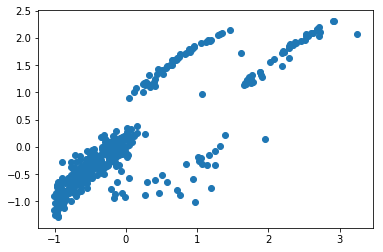

In [30]:
plt.scatter(y_test,predictions)

In [31]:
coeffecients = pd.DataFrame(model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,0.022626
sex,-0.011533
bmi,0.026914
children,0.038461
smoker,2.039901
northwest,-0.009859
southeast,-0.059785
southwest,-0.073088


In [32]:
model.intercept_

-2.1252987641939374

In [33]:
cols

array(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'], dtype=object)

In [34]:
results = smf.ols('charges ~ age+sex+bmi+children+smoker+northwest+southeast+southwest',data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Sun, 08 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:21:57   Log-Likelihood:                -968.38
No. Observations:                1337   AIC:                             1955.
Df Residuals:                    1328   BIC:                             2002.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.888e-17      0.014  -7.22e-15      1.0

In [35]:
results = smf.ols('charges ~ age+bmi+children+smoker',data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     996.5
Date:                Sun, 08 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:21:57   Log-Likelihood:                -971.65
No. Observations:                1337   AIC:                             1953.
Df Residuals:                    1332   BIC:                             1979.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.888e-17      0.014  -7.21e-15      1.0

## Ridge regression

In [36]:
X_train, X_test, y_train, y_test=cross_validation.train_test_split(X, Y, test_size=0.3)

In [37]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [38]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.43487450130889171

In [39]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)
metrics.mean_squared_error(y_test, ridge.predict(X_test))

0.2743443672834458

In [40]:
metrics.explained_variance_score(y_test, ridge.predict(X_test))

0.75619158783524454

In [41]:
pd.Series(ridge.coef_, index=X.columns)

age          0.021730
sex         -0.029963
bmi          0.027824
children     0.042763
smoker       1.927174
northwest   -0.026151
southeast   -0.093263
southwest   -0.118051
dtype: float64

## Lasso Regression

In [42]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [43]:
lasso = Lasso(max_iter=10000)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
metrics.mean_squared_error(y_test, lasso.predict(X_test))

0.27369720834044442

In [44]:
metrics.explained_variance_score(y_test, lasso.predict(X_test))

0.75677997865194424

In [45]:
pd.Series(lasso.coef_, index=X.columns)

age          0.021757
sex         -0.010175
bmi          0.026978
children     0.039355
smoker       1.903586
northwest    0.000000
southeast   -0.043610
southwest   -0.067854
dtype: float64